In [1]:
#importing packages
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [53]:
def get_rpyrt_by_class(y=1):
    index={'1':1,'3':2,'5':3,'7':4}
    sc= pd.read_csv("../data/sc_final.csv")
    yname='RPY_'+ str(y) +'YR_RT'
    sc_sub=sc.iloc[:,[index[str(y)]]+range(5,sc.shape[1])]
    sc_sub=sc_sub.convert_objects(convert_numeric=True)
    sc_sub=sc_sub.dropna(subset=[yname])
    pro=0.3
    sc_sub=sc_sub.dropna(axis=0,how='all')
    sc_sub=sc_sub.dropna(axis=1,thresh=np.ceil(sc_sub.shape[1]*(1-pro)))
    return sc_sub

In [3]:
sc_rpt1=get_rpyrt_by_class(1)

C:\Users\b_luo\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2822: DtypeWarning: Columns (1,2,3,4,6,11,12,13,14,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,6

In [67]:
def get_corplot_by_class(y=1,thre=20):
    yname='RPY_'+ str(y) +'YR_RT'
    sc_rpt=get_rpyrt_by_class(y)
    cor=sc_rpt.corr()
    corr=abs(cor).sort_values([yname],ascending=0)[yname]
    sc_cor=cor.loc[corr.index[0:thre],corr.index[0:thre]]
    fig, ax = plt.subplots(figsize=(10,7)) 
    sns.heatmap(abs(sc_cor),ax=ax, xticklabels=sc_cor.columns,yticklabels=sc_cor.columns)
    return cor.loc[corr.index[0:thre],corr.index[0:thre]]

C:\Users\b_luo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


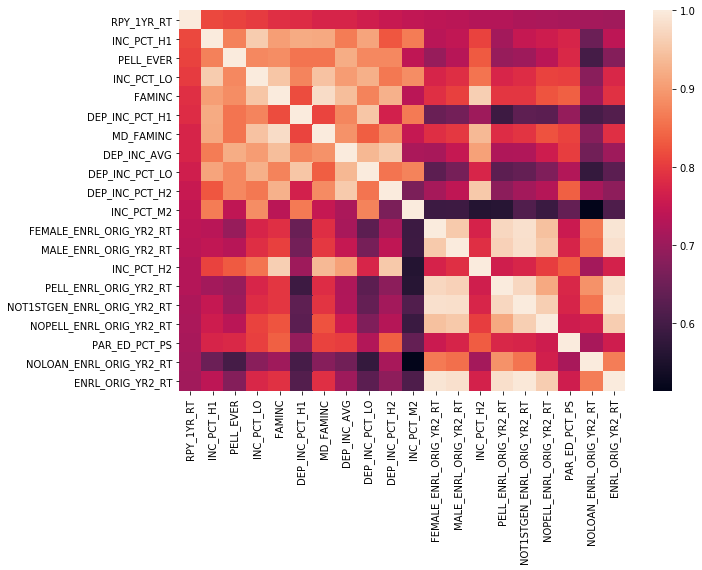

In [35]:
get_corplot_by_class(1)

C:\Users\b_luo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


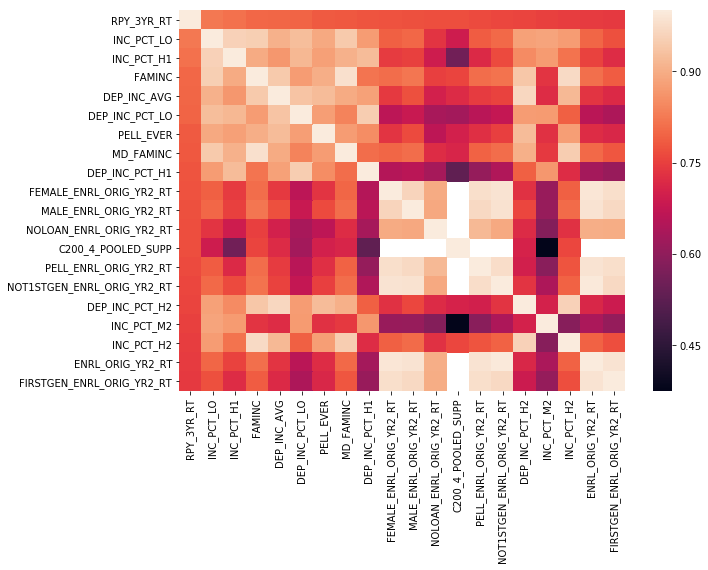

In [54]:
get_corplot_by_class(3)

C:\Users\b_luo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


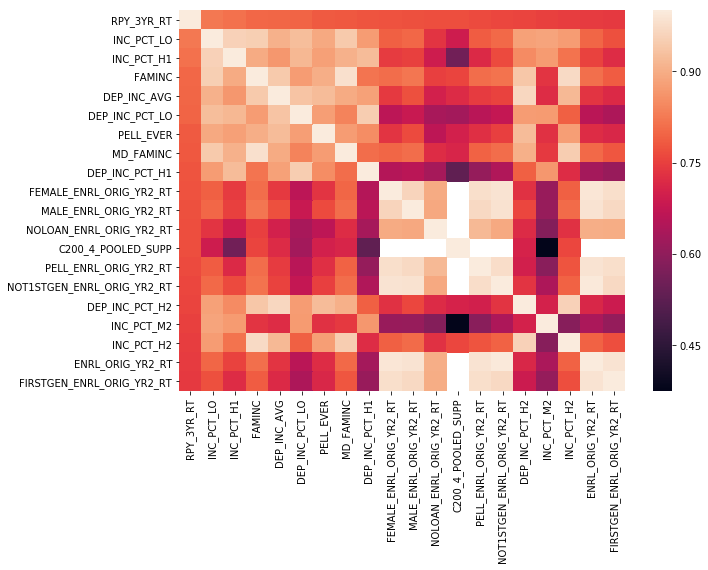

In [68]:
corr=get_corplot_by_class(3)

In [4]:
x=[float(a) for a in sc_rpt1['RPY_1YR_RT']]

(0.0328205128, 0.954248366)

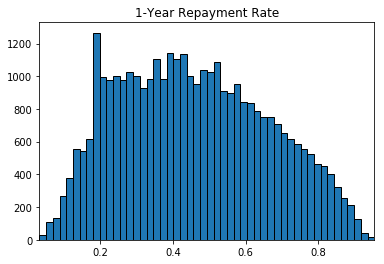

In [5]:
fig, axes = plt.subplots()
axes.hist(x,bins=50,ec='black')
axes.set_title("1-Year Repayment Rate")
axes.set_xlim((min(x), max(x)))

In [4]:
cor=sc_rpt1.corr()

In [21]:
thre=20
corr=abs(cor).sort_values(['RPY_1YR_RT'],ascending=0)['RPY_1YR_RT']
sc1_cor=cor.loc[corr.index[0:thre],corr.index[0:thre]]
#sns.heatmap(sc_rpt1[corr.index[0:thre]],annot=True)


In [12]:
sc1_cor.head()

,RPY_1YR_RT,INC_PCT_H1,PELL_EVER,INC_PCT_LO,FAMINC,DEP_INC_PCT_H1,MD_FAMINC,DEP_INC_AVG,DEP_INC_PCT_LO,DEP_INC_PCT_H2
RPY_1YR_RT,1.000000,0.815670,-0.808683,-0.801793,0.787495,0.784575,0.773515,0.773407,-0.763898,0.751378
INC_PCT_H1,0.815670,1.000000,-0.870945,-0.958296,0.903737,0.920023,0.916551,0.866466,-0.911108,0.827679
PELL_EVER,-0.808683,-0.870945,1.000000,0.880185,-0.885932,-0.859208,-0.858237,-0.921452,0.879351,-0.880253
INC_PCT_LO,-0.801793,-0.958296,0.880185,1.000000,-0.952283,-0.875856,-0.947105,-0.902501,0.925530,-0.862374
FAMINC,0.787495,0.903737,-0.885932,-0.952283,1.000000,0.819237,0.980613,0.942381,-0.874513,0.927480


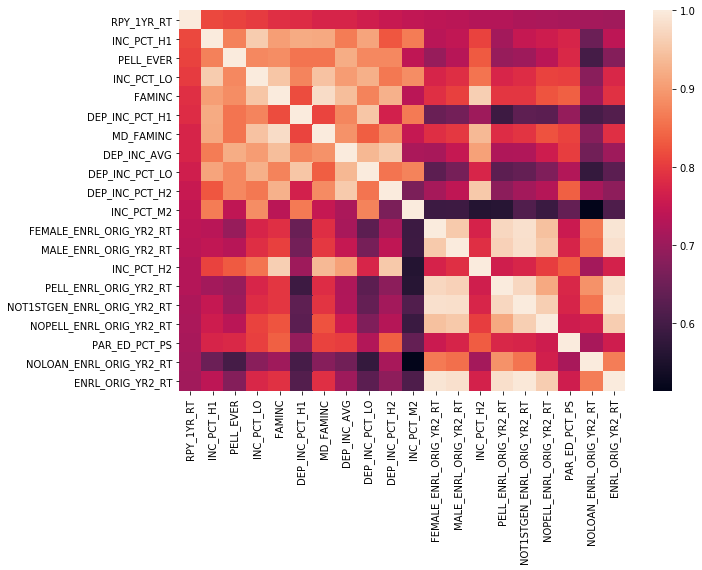

In [31]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(sc1_cor),ax=ax,
        xticklabels=sc1_cor.columns,
        yticklabels=sc1_cor.columns)

In [52]:
abs(cor).sort_values(['RPY_1YR_RT'],ascending=0)['RPY_1YR_RT'].index

Index([u'RPY_1YR_RT', u'INC_PCT_H1', u'PELL_EVER', u'INC_PCT_LO', u'FAMINC',
       u'DEP_INC_PCT_H1', u'MD_FAMINC', u'DEP_INC_AVG', u'DEP_INC_PCT_LO',
       u'DEP_INC_PCT_H2',
       ...
       u'FIRSTGEN_ENRL_ORIG_YR6_RT', u'CIP48CERT4', u'DEATH_YR2_RT',
       u'CIP12BACHL', u'CIP44CERT2', u'CIP04CERT4', u'CIP25CERT4',
       u'CIP49ASSOC', u'UNKN_2YR_TRANS_YR8_RT', u'CIP41CERT4'],
      dtype='object', length=1431)

In [55]:
# Load Dictionary
dic_file=pd.ExcelFile("../data/CollegeScorecardDataDictionary.xlsx")
dic_init = dic_file.parse("data_dictionary")
    
# Clean Dictionary
dic=dic_init.ix[dic_init['VARIABLE NAME'].notnull()]

C:\Users\b_luo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [56]:
dic.head()

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,Unit ID for institution,root,id,integer,UNITID,NaN,NaN,IPEDS,Shown/used on consumer website.
1,8-digit OPE ID for institution,root,ope8_id,integer,OPEID,NaN,NaN,IPEDS,Shown/used on consumer website.
2,6-digit OPE ID for institution,root,ope6_id,integer,OPEID6,NaN,NaN,IPEDS,Shown/used on consumer website.
3,Institution name,school,name,autocomplete,INSTNM,NaN,NaN,IPEDS,Shown/used on consumer website.
4,City,school,city,autocomplete,CITY,NaN,NaN,IPEDS,Shown/used on consumer website.


In [70]:
sub_dic=dic.loc[dic['VARIABLE NAME'].isin(corr.index[0:20])][['NAME OF DATA ELEMENT','VARIABLE NAME','dev-category']]

In [64]:
sub_dic.to_csv('../data/sub_dic3.csv')

In [95]:
pd.concat([sub_dic,corr.iloc[0:20,0:20].loc[sub_dic['VARIABLE NAME'],'RPY_3YR_RT']],axis=1,join='outer')

,NAME OF DATA ELEMENT,VARIABLE NAME,dev-category,RPY_3YR_RT
678,Percent still enrolled at original institution...,ENRL_ORIG_YR2_RT,completion,NaN
756,Percent of female students who were still enro...,FEMALE_ENRL_ORIG_YR2_RT,completion,NaN
769,Percent of male students who were still enroll...,MALE_ENRL_ORIG_YR2_RT,completion,NaN
782,Percent of students who received a Pell Grant ...,PELL_ENRL_ORIG_YR2_RT,completion,NaN
821,Percent of students who never received a feder...,NOLOAN_ENRL_ORIG_YR2_RT,completion,NaN
834,Percent of first-generation students who were ...,FIRSTGEN_ENRL_ORIG_YR2_RT,completion,NaN
847,Percent of not-first-generation students who w...,NOT1STGEN_ENRL_ORIG_YR2_RT,completion,NaN
1595,Fraction of repayment cohort who are not in de...,RPY_3YR_RT,repayment,NaN
1637,Percentage of aided students whose family inco...,INC_PCT_LO,student,NaN
1640,Percentage of students who are financially dep...,DEP_INC_PCT_LO,student,NaN
